In [1]:
%matplotlib inline

import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

Using TensorFlow backend.


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data = []
for i in range(1, 6):
    data.append(unpickle('data_batch_' + str(i)))

In [4]:
test = unpickle('test_batch')

In [5]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

In [6]:
x = []
y = []

for i in range(5):
    d = data[i][b'data'].reshape(10000, 3, 32, 32)
    labels = data[i][b'labels']


    for j in range(10000):
        x.append(np.transpose(d[j], (1, 2, 0)))
        y.append(labels[j])

x = np.array(x)
y = np.array(y)

In [7]:
d = test[b'data'].reshape(10000, 3, 32, 32)
labels = test[b'labels']

x_test = []
y_test = []

for i in range(10000):
    x_test.append(np.transpose(d[i], (1, 2, 0)))
    y_test.append(labels[i])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [9]:
def visualize_images(data, labels, cols=4, rows=4, size=10):
    fig = plt.figure(figsize=(size, size))
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(label_names[labels[i]])
    plt.show()

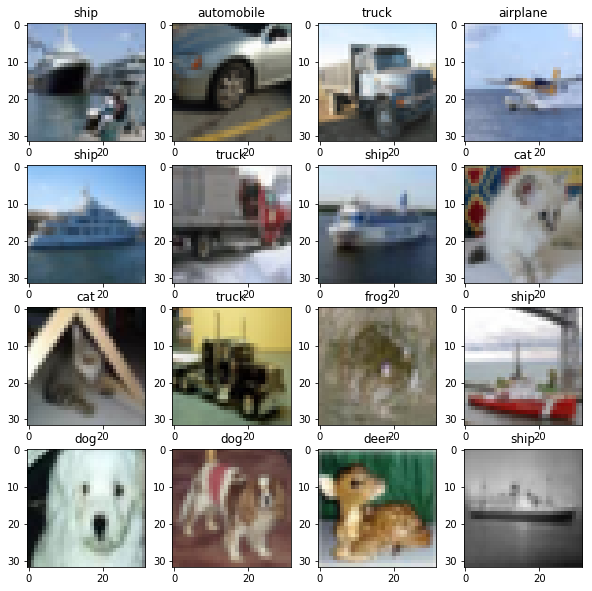

In [10]:
visualize_images(x_train, y_train)

In [11]:
model = Sequential()
num_classes = len(label_names)

y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [12]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [14]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

In [15]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_val, y_val),
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 140s 3ms/step - loss: 1.8987 - acc: 0.3039 - val_loss: 1.6318 - val_acc: 0.4154
Epoch 2/10
40000/40000 [==============================] - 140s 3ms/step - loss: 1.5812 - acc: 0.4289 - val_loss: 1.4385 - val_acc: 0.4794
Epoch 3/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.4324 - acc: 0.4841 - val_loss: 1.3030 - val_acc: 0.5284
Epoch 4/10
40000/40000 [==============================] - 140s 3ms/step - loss: 1.3285 - acc: 0.5302 - val_loss: 1.2193 - val_acc: 0.5700
Epoch 5/10
40000/40000 [==============================] - 141s 4ms/step - loss: 1.2514 - acc: 0.5553 - val_loss: 1.1377 - val_acc: 0.5964
Epoch 6/10
40000/40000 [==============================] - 151s 4ms/step - loss: 1.1856 - acc: 0.5806 - val_loss: 1.1194 - val_acc: 0.6025
Epoch 7/10
40000/40000 [==============================] - 151s 4ms/step - 

In [27]:
scores = model.evaluate(
    x_val,
    y_val,
    verbose=1
)

10000/10000 [==============================] - 12s 1ms/step


In [16]:
save_dir = os.path.join(os.getcwd(), 'Models')

In [17]:
model_path = os.path.join(save_dir, 'test_model')
model.save(model_path)

In [31]:
np.save(save_dir + '/x_train', x_train)
np.save(save_dir + '/x_val', x_val)
np.save(save_dir + '/y_train', y_train)
np.save(save_dir + '/y_val', y_val)